In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

import shap

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

# EDA and Feature Engineering

In [155]:
df = pd.read_csv('train.csv', index_col=0)

In [156]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [157]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [158]:
#Looking for Null values and checking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

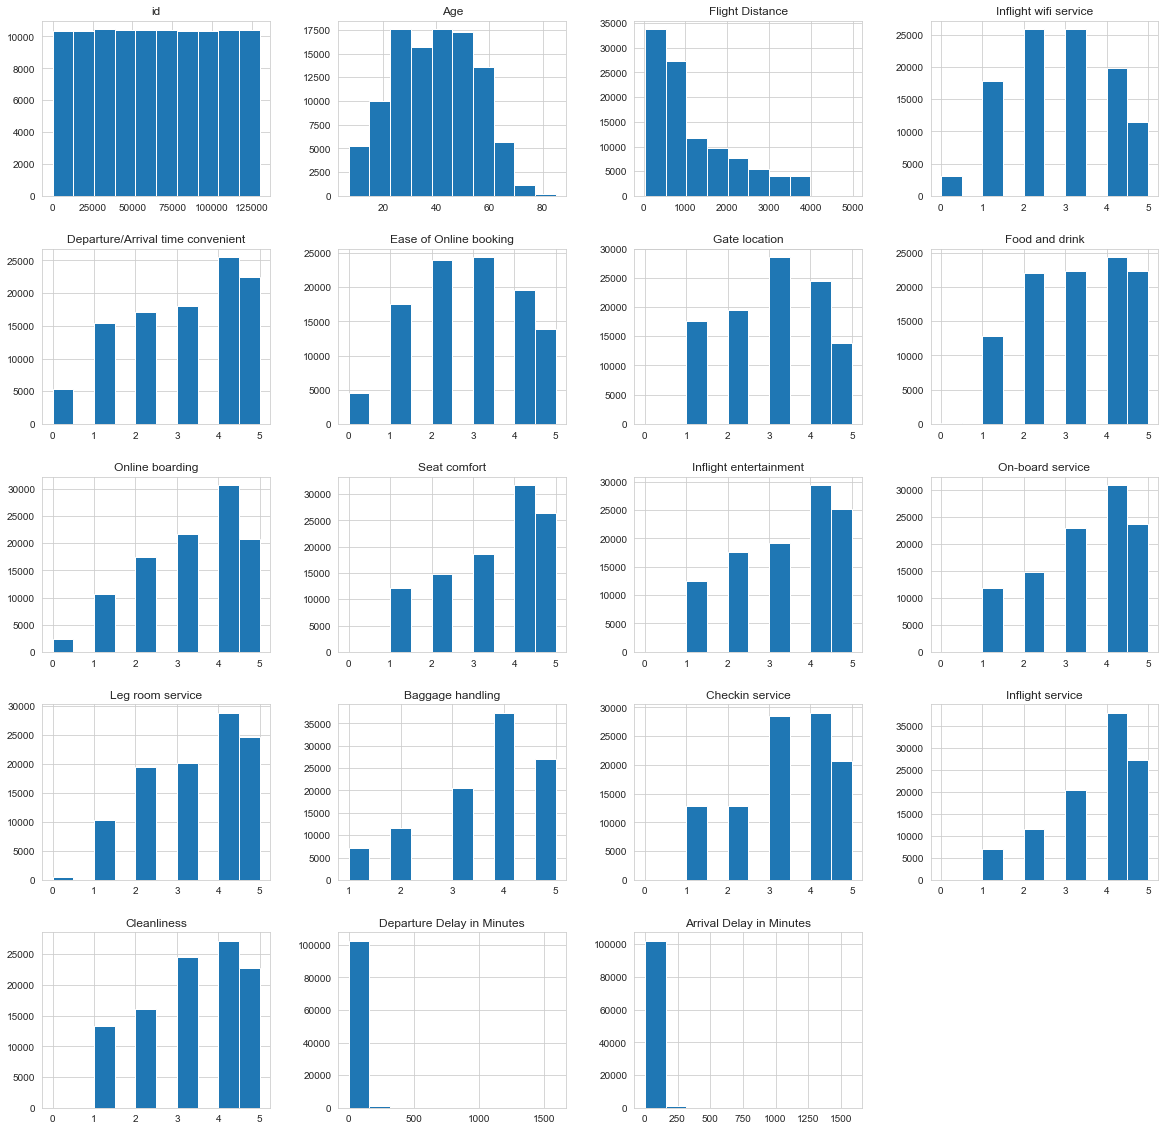

In [159]:
#Checking the distribution of the individual columns in the dataset
df.hist(figsize=(20,20));

In [160]:
# Checked to see if there was a pattern to the rows with Null values
df[df['Arrival Delay in Minutes'].isna() == True]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
2485,121173,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,4,3,3,4,3,3,5,4,4,5,4,3,3,NaN,satisfied
2630,3638,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,3,5,4,5,5,5,5,5,5,5,0,NaN,satisfied
3621,48387,Male,Loyal Customer,47,Personal Travel,Eco,587,1,2,1,3,4,1,4,4,1,1,4,4,4,4,17,NaN,neutral or dissatisfied
4041,66091,Male,Loyal Customer,31,Business travel,Business,2490,1,1,1,1,4,4,4,4,3,5,5,4,4,4,6,NaN,satisfied
4490,48504,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,3,2,4,2,2,5,1,4,1,3,2,22,NaN,neutral or dissatisfied


In [161]:
#Since no obvious pattern was found, checked the statistics to find a reasonable way to fill in the Null values
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

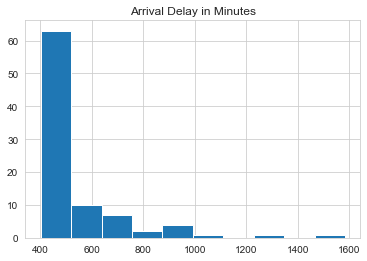

In [162]:
df[df['Arrival Delay in Minutes'] > 400].hist(column='Arrival Delay in Minutes');

In [163]:
#Since 0 was both median and mode, which are statistics that are more rubust against the 
#outliers in the data, we decided to use it as the most non-disruptive way of replacing null 
#values
df = df.fillna(0)

In [164]:
#looking to see if rows in id columns were unique 
df.id.duplicated().sum()

0

In [165]:
#Since column is unique and provides no real insights, we decided to drop it
df.drop('id', axis=1, inplace=True)

In [166]:
#Created features to corresponding to whether there were no delays on a flight,
#type of delay, or if both arrival and departure were both delayed to see if there 
#was a relationship with overall satisfaction
df['No_Delays'] = [1 if x == 0 else 0 for x in df['Arrival Delay in Minutes']+df['Departure Delay in Minutes']]

df['Departure_Delay'] = [1 if x > 0 else 0 for x in df['Departure Delay in Minutes']]

df['Arrival_Delay'] = [1 if x > 0 else 0 for x in df['Arrival Delay in Minutes']]

df['2_Delays'] = [1 if x == 2 else 0 for x in df['Arrival_Delay']+df['Departure_Delay']]

In [167]:
#Grouped the columns into age ranges to see if we could better see a relationship that 
#wasn't as easy to see with only Age
conditions= [
    df['Age'].isin(range(7,18)),
    df['Age'].isin(range(18,30)),
    df['Age'].isin(range(30,40)),
    df['Age'].isin(range(40,50)),
    df['Age'].isin(range(50,60)),
    df['Age'].isin(range(60,70)),
    df['Age'].isin(range(70,100)),
]

choices= [
    'Under 18', 
    '19-29',
    '30-39',
    '40-49', 
    '50-59',
    '60-69',
    '70+'
]

df['Age_Range']= np.select(conditions, choices, 0)

In [168]:
#Replaced zeros with ones because there wasn't enough obesevations of zeros, 
#in these columns, to be significant in our dataset
cols = ['Gate location', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Checkin service', 'Inflight service', 'Cleanliness']
df[cols] = df[cols].replace({0:1})

In [169]:
#Separated grouped Flight Distance into Flight Length according the to the definitions of 
#short, medium, and long haul flights, to see if there is an overall relationship with 
#satisfaction
df['Flight_Length'] = ['Short_Flight' if x <= 800 else 'Long_Flight' if x >=2200 else 'Medium_Flight' for x in df['Flight Distance']]                                           

# Modeling

### We decided on 3 models to start, DummyClassifier as our baseline, LogisticRegression and DecisionTreeClassifier because we felt they would be our most interpretable options.

In [170]:
#Changed the string values in our satisfaction column to ones and zeros to make it easier to 
#use it in our models
df.satisfaction = [1 if x == 'satisfied' else 0 for x in df.satisfaction]

#### In the next few cells, we prepared our dataset for modeling by separating our target from the predictors, splitting the dataset into testing and training data, OneHotEncoding our catagorical features, and scaling our numerical features

In [171]:
target = df.satisfaction
predictors = df.drop('satisfaction', axis=1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=1)

In [173]:
ohe_cols = ['Gender','Customer Type','Type of Travel','Class','Flight_Length','Age_Range']

In [174]:
X_train_cat = X_train[ohe_cols]
X_test_cat = X_test[ohe_cols]
X_train_num = X_train.drop(ohe_cols,axis=1)
X_test_num = X_test.drop(ohe_cols,axis=1)

In [175]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train_cat)

OneHotEncoder(sparse=False)

In [176]:
X_tr_ohe = pd.DataFrame(ohe.transform(X_train_cat),
                                  columns=ohe.get_feature_names()
                                    )

X_te_ohe = pd.DataFrame(ohe.transform(X_test_cat),
                                  columns=ohe.get_feature_names()
                                    )


In [177]:
X_cols = X_train_num.columns

In [178]:
ss = StandardScaler()

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_num), columns=X_cols)
X_test_scaled = pd.DataFrame(ss.transform(X_test_num), columns=X_cols)

In [179]:
X_train = pd.concat([X_train_scaled, X_tr_ohe], axis=1)
X_test = pd.concat([X_test_scaled, X_te_ohe], axis=1)

## Dummy model

#### Created a dummy model as a baseline to have something to compare our other models against

In [180]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [181]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

#### We decided to use accuracy and precision as our metrics to measure how successful our model was because we only really care about how accurately our model can determine who would be a satisfied or unsatified customer.

In [182]:
#We didnt calculate precision for the dummy model because our DummyClassifier strategy of 
#'most frequent' returns an array of zeros, which raises an undefined metric error for our 
#precision formula and measures it as zero
dummy_pred = dummy_model.predict(X_test)

dummy_accuracy = metrics.accuracy_score(y_test, dummy_pred)
dummy_accuracy

0.5678703418540191

## Logistic Regression

#### We started with a simple logistic regression model and a parameter of 10000 interations.

In [183]:
logreg = LogisticRegression(max_iter=10000)

In [184]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [185]:
logreg_preds = logreg.predict(X_test)

logreg_accuracy = metrics.accuracy_score(y_test, logreg_preds)
logreg_precision = metrics.precision_score(y_test, logreg_preds)
logreg_accuracy, logreg_precision

(0.8789267015706806, 0.874351371386212)

## Decision Tree

#### Started with a simple Decision tree with default parameters 

In [186]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_accuracy = metrics.accuracy_score(y_test, dtc_preds)
dtc_precision = metrics.precision_score(y_test, dtc_preds)
dtc_accuracy, dtc_precision


(0.9454496458269172, 0.9349059950336999)

#### Out of our 2 models, Decision tree performed the best, we decided to increase complexity with a Random Forest to try to lessen overfitting

In [40]:
rfc_simple = RandomForestClassifier()

rfc_simple.fit(X_train, y_train)

rfc_preds = rfc_simple.predict(X_test)

rfc_accuracy = metrics.accuracy_score(y_test, rfc_preds)
rfc_precision = metrics.precision_score(y_test, rfc_preds)
rfc_accuracy, rfc_precision


(0.9598860486603018, 0.9665536516081737)

#### To try to find the best parameters for the RandomForest, we used multiple grid searches, each building on the best parameters of the previous model, until an optimal solution was found.

In [42]:
param_grid = { 
    'n_estimators': [10, 100, 500],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 10, 20]
}
scoring = ['accuracy', 'precision']

In [43]:
grid_tree_1=GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring=scoring, refit='accuracy', verbose=1, n_jobs=-1)

In [44]:
grid_tree_1.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 11.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 10, 20],
                         'n_estimators': [10, 100, 500]},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [45]:
print(grid_tree_1.best_estimator_)
grid_tree_1.best_params_

RandomForestClassifier(max_features=20, n_estimators=500)


{'max_depth': None, 'max_features': 20, 'n_estimators': 500}

In [46]:
grid_tree_1.best_score_

0.9629529822400165

In [47]:
param_grid = { 
    'n_estimators': [50 ,100, 150],
    'max_depth': [None],
    'max_features': [15, 20, 25]
}

In [48]:
grid_tree_2=GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring=scoring, refit='accuracy', verbose=1, n_jobs=-1)
grid_tree_2.fit(X_train, y_train)
print(grid_tree_2.best_estimator_)
print(grid_tree_2.best_params_)
grid_tree_2.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.9min finished


RandomForestClassifier(max_features=25)
{'max_depth': None, 'max_features': 25, 'n_estimators': 100}


0.9625423467816446

In [49]:
param_grid = { 
    'n_estimators': [150],
    'max_depth': [None],
    'max_features': [15],
    'min_impurity_decrease':[.1,.05,.01,.001],
    'min_samples_leaf':[1, 10, 100, 1000]
}

In [50]:
grid_tree_3=GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring=scoring, refit='accuracy', verbose=1, n_jobs=-1)
grid_tree_3.fit(X_train, y_train)
print(grid_tree_3.best_estimator_)
print(grid_tree_3.best_params_)
grid_tree_3.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.5min finished


RandomForestClassifier(max_features=15, min_impurity_decrease=0.001,
                       min_samples_leaf=10, n_estimators=150)
{'max_depth': None, 'max_features': 15, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 10, 'n_estimators': 150}


0.9326172877527975

In [51]:
#Looked though the cv_results to see if there was a large varience in scores 
#between min_samples_leaf values
pd.DataFrame(grid_tree_3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,6.697368,0.031578,0.465802,0.011816,None,15,0.1,1,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.817293,0.809709,0.819025,0.815342,0.004046,13,0.876443,0.877958,0.870542,0.874981,0.003200,5
1,6.964473,0.165895,0.420901,0.015678,None,15,0.1,10,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.817293,0.809709,0.819025,0.815342,0.004046,13,0.876443,0.877958,0.870542,0.874981,0.003200,5
2,6.884031,0.318006,0.397950,0.051965,None,15,0.1,100,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.817293,0.809709,0.819025,0.815342,0.004046,13,0.876443,0.877958,0.870542,0.874981,0.003200,5
3,6.287140,0.094617,0.332456,0.006760,None,15,0.1,1000,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.817293,0.787304,0.819025,0.807874,0.014563,16,0.876443,0.723008,0.870542,0.823331,0.070980,16
4,7.950036,0.086679,0.384565,0.005483,None,15,0.05,1,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.846666,0.844895,0.848630,0.846730,0.001525,11,0.865870,0.855641,0.858890,0.860134,0.004267,13
5,8.202695,0.100571,0.345344,0.004300,None,15,0.05,10,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.846859,0.845704,0.849592,0.847385,0.001630,10,0.865937,0.857762,0.860572,0.861424,0.003391,12
6,8.748028,0.565398,0.388303,0.070454,None,15,0.05,100,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.847205,0.848129,0.851825,0.849053,0.001996,9,0.866942,0.863772,0.866068,0.865594,0.001337,10
7,9.375611,0.043855,0.440825,0.021328,None,15,0.05,1000,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.845242,0.845280,0.849322,0.846615,0.001915,12,0.861577,0.856974,0.860123,0.859558,0.001921,14
8,14.160382,0.072432,0.379940,0.007453,None,15,0.01,1,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.865068,0.868494,0.869572,0.867711,0.001920,7,0.865912,0.864519,0.863523,0.864651,0.000980,11
9,12.676214,1.144692,0.627863,0.173627,None,15,0.01,10,150,"{'max_depth': None, 'max_features': 15, 'min_i...",0.867031,0.872613,0.870996,0.870214,0.002345,5,0.868143,0.865784,0.868529,0.867485,0.001213,8


In [97]:
#fit a final RandomForestCLassifier with the optimal parameters so that we could pull
#feature importances 
rfc_2 = RandomForestClassifier(max_features=15, min_impurity_decrease=0.001, min_samples_leaf = 100,
                       n_estimators=150)
rfc_2.fit(X_train, y_train)

RandomForestClassifier(max_features=15, min_impurity_decrease=0.001,
                       min_samples_leaf=100, n_estimators=150)

In [ ]:
rfc_preds = rfc_2.predict(X_test)

In [52]:
rfc_accuracy = metrics.accuracy_score(y_test, rfc_preds)
rfc_precision = metrics.precision_score(y_test, rfc_preds)
rfc_accuracy, rfc_precision

(0.9317831844779797, 0.9288630795753562)

#### Although there is a ~3% decrease in accurancy in comparison to the simple random forest classifer, we believe it is due to the reduction in overfitting and the latest models ability to better generalize. 

In [192]:
np.round_(rfc_2.feature_importances_,3)

array([0.004, 0.003, 0.157, 0.002, 0.027, 0.003, 0.001, 0.297, 0.028,
       0.058, 0.018, 0.02 , 0.007, 0.012, 0.009, 0.014, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.027, 0.021, 0.07 ,
       0.066, 0.103, 0.053, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [193]:
#Zipped together the the feature importance with their respective column name and ordered them by value
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, np.round(rfc_2.feature_importances_, 3))
}
{k: v for k, v in sorted(feat_import.items(), key=lambda item: item[1], reverse=True)}

{'Online boarding': 0.297,
 'Inflight wifi service': 0.157,
 'x3_Business': 0.103,
 'x2_Business travel': 0.07,
 'x2_Personal Travel': 0.066,
 'Inflight entertainment': 0.058,
 'x3_Eco': 0.053,
 'Seat comfort': 0.028,
 'Ease of Online booking': 0.027,
 'x1_Loyal Customer': 0.027,
 'x1_disloyal Customer': 0.021,
 'Leg room service': 0.02,
 'On-board service': 0.018,
 'Cleanliness': 0.014,
 'Checkin service': 0.012,
 'Inflight service': 0.009,
 'Baggage handling': 0.007,
 'Age': 0.004,
 'Flight Distance': 0.003,
 'Gate location': 0.003,
 'Departure/Arrival time convenient': 0.002,
 'Food and drink': 0.001,
 'Departure Delay in Minutes': 0.0,
 'Arrival Delay in Minutes': 0.0,
 'No_Delays': 0.0,
 'Departure_Delay': 0.0,
 'Arrival_Delay': 0.0,
 '2_Delays': 0.0,
 'x0_Female': 0.0,
 'x0_Male': 0.0,
 'x3_Eco Plus': 0.0,
 'x4_Long_Flight': 0.0,
 'x4_Medium_Flight': 0.0,
 'x4_Short_Flight': 0.0,
 'x5_19-29': 0.0,
 'x5_30-39': 0.0,
 'x5_40-49': 0.0,
 'x5_50-59': 0.0,
 'x5_60-69': 0.0,
 'x5_70+': 

### In the next cells, we graph the top 10 largest feature importances and the relationship the features themselves have with satisfaction

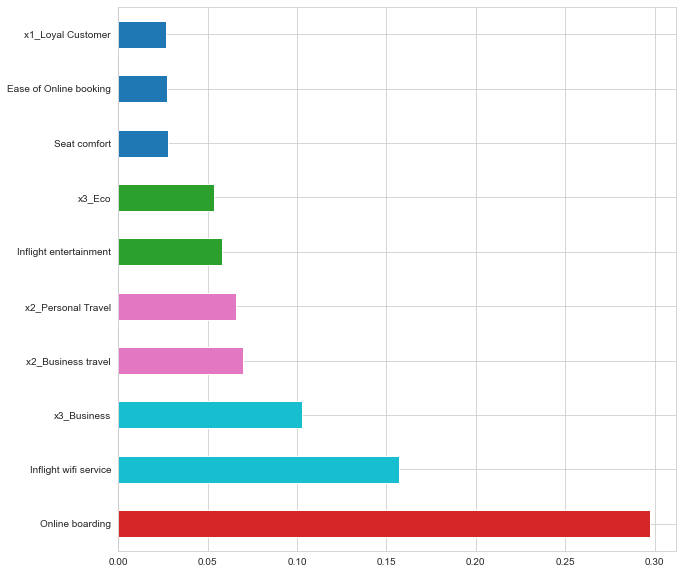

In [194]:
(pd.Series(rfc_2.feature_importances_, index=X_train.columns)).nlargest(10).plot.barh(figsize=(10,10), color=['C3','C9','C9','C6','C6','C2','C2','C10','C10','C10']);

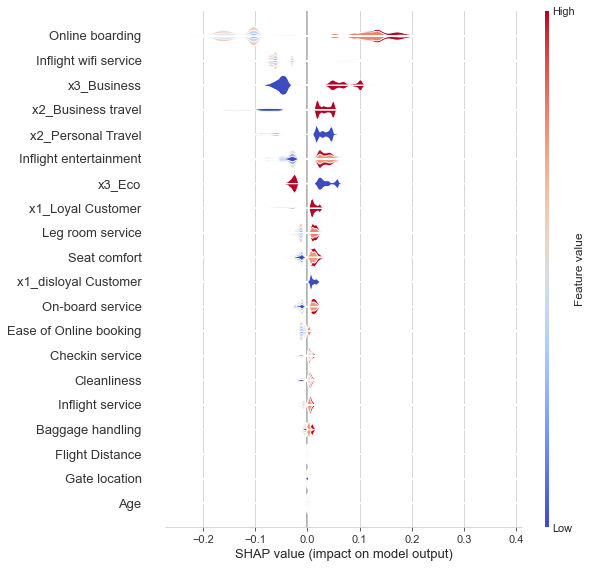

In [148]:
shap_values = shap.TreeExplainer(rfc_2).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type="layered_violin", color='coolwarm');

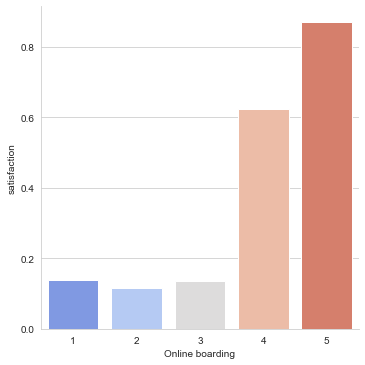

In [126]:
sns.catplot(x="Online boarding", y="satisfaction",
                data=df[df['Online boarding'] != 0], 
                kind="bar", ci=None, aspect=1, palette='coolwarm');

In [127]:
df.groupby(['Online boarding', 'satisfaction']).size()

Online boarding  satisfaction
0                0                1077
                 1                1351
1                0                9219
                 1                1473
2                0               15486
                 1                2019
3                0               18845
                 1                2959
4                0               11596
                 1               19166
5                0                2656
                 1               18057
dtype: int64

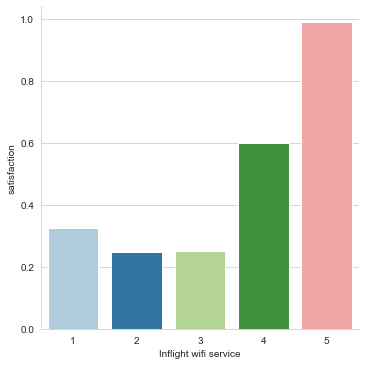

In [128]:
sns.catplot(x="Inflight wifi service", y="satisfaction",
                data=df[df['Inflight wifi service']!=0], #saturation=.5,
                kind="bar", ci=None, aspect=1, palette='Paired');

In [129]:
df.groupby(['Inflight wifi service','satisfaction']).size()

Inflight wifi service  satisfaction
0                      0                   8
                       1                3095
1                      0               12034
                       1                5806
2                      0               19407
                       1                6423
3                      0               19386
                       1                6482
4                      0                7938
                       1               11856
5                      0                 106
                       1               11363
dtype: int64

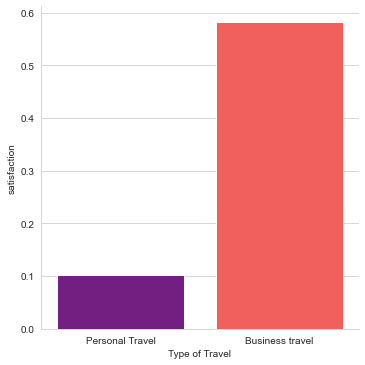

In [130]:
sns.catplot(x="Type of Travel", y="satisfaction",
                data=df, saturation=1,
                kind="bar", ci=None, aspect=1, palette='magma');

In [131]:
df.groupby(['Type of Travel','satisfaction']).size()

Type of Travel   satisfaction
Business travel  0               29909
                 1               41746
Personal Travel  0               28970
                 1                3279
dtype: int64

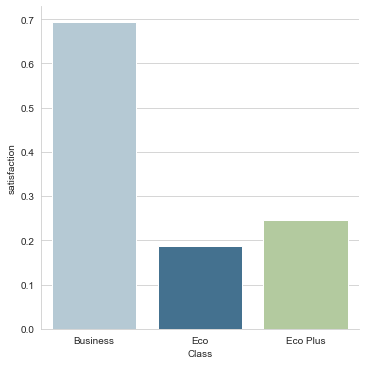

In [132]:
sns.catplot(x="Class", y="satisfaction",
                data=df.sort_values('Class'), saturation=.5,
                kind="bar", ci=None, aspect=1, palette='Paired');

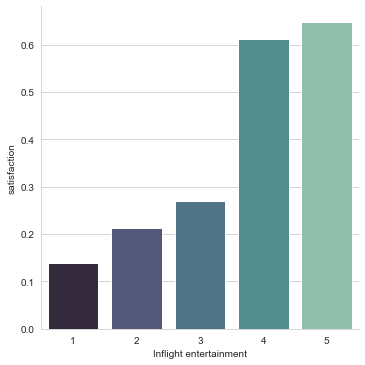

In [133]:
sns.catplot(x="Inflight entertainment", y="satisfaction",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1, palette='mako');

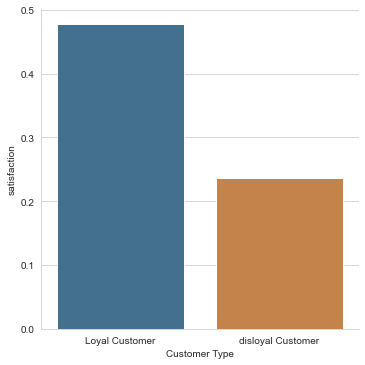

In [134]:
sns.catplot(x="Customer Type", y="satisfaction",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1);

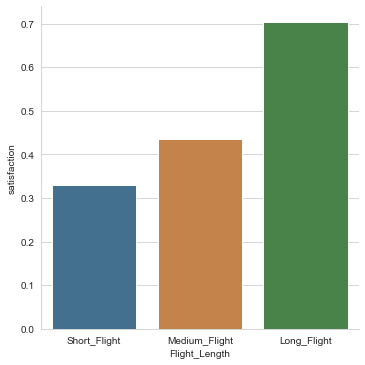

In [135]:
sns.catplot(x="Flight_Length", y="satisfaction",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1);

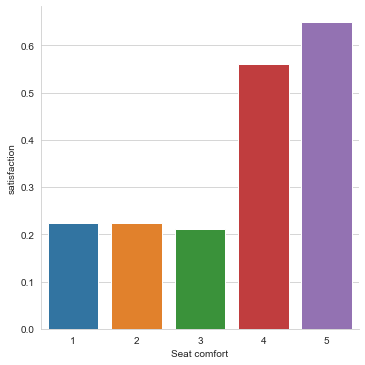

In [136]:
sns.catplot(x="Seat comfort", y="satisfaction",
                data=df, #saturation=.5,
                kind="bar", ci=None, aspect=1);

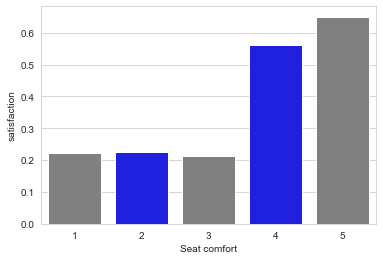

In [137]:
sns.set_style('whitegrid')
x = df['Seat comfort']
y = df['satisfaction']
fig, ax = plt.subplots()
clrs = ['grey' if x > 4 else 'blue' for x in x]
ax = sns.barplot(x=x,y=y, data=df, palette= clrs, ci=None)
ax.ticklabel_format(style='plain', axis='y')
plt.show();
